# Homework 2
## William Olsen

### Question 1

A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

In [53]:
# general imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# general graphing setup
plt.rcParams["figure.figsize"] = (15,10)

There are $6*6$ total combinations for the rolls of two six sided dice.  There is only one way to get snake eyes (rolling a one on each dice) compared to many ways to roll a seven.

Note: For this problem and subsequent problems we will note that the probability of one outcome on a 6-sided dice is $\frac{1}{6}$

Rolling a seven: 1/6, 2/5, 3/4, 4/3, 5/2, 6/1 - thus there are 6 ways to roll a seven.

$$\text{P(snake eyes)} = \frac{1}{36} = 0.0278$$

$$\text{P(seven)} = \frac{6}{36} = 0.167$$

Another method to get this same result is to ask the question: _What is the probabily of rolling a 1 AND a 1?_ which is $\frac{1}{6} * \frac{1}{6} = \frac{1}{36}$

And to calculate the probability of getting seven we use the convolution operator: $P(7) = \sum_z P_{dice1}(z) P_{dice2}(7-z)$ where $1 \le z \le 6$ so we have:

$$P(7) = P(1)*P(6) + P(2)*P(5) + P(3)*P(4) + P(4)*P(3) + P(5)*P(2) + P(6)*P(1) = 6 * \frac{1}{36} = \frac{6}{36}$$

Their ratio: $\frac{\frac{1}{36}}{\frac{6}{36}} = \frac{1}{6} = 0.167$

### Question 2

Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

We need to know the probabilities of rolling 2 all the way up to rolling 12.  We can determine these probabilities using the convolutional operator: $P(x) = \sum_z P_{dice1}(z) P_{dice2}(x-z)$.  Recall again that $1 \le z \le 6$ and also that $P(a) = \frac{1}{6}$ if $1 \le z \le 6$ otherwise $P(a) = 0$.  Thus:

$$P(2) = P(1)*P(1) = \frac{1}{36}$$
$$P(3) = P(1)*P(2) + P(2)*P(1) = \frac{2}{36}$$
$$P(4) = P(1)*P(3) + P(2)*P(2) + P(3)*P(1) = \frac{3}{36}$$
$$P(5) = P(1)*P(4) + P(2)*P(3) + P(3)*P(2) + P(4)*P(1) = \frac{4}{36}$$
$$P(6) = P(1)*P(5) + P(2)*P(4) + P(3)*P(3) + P(4)*P(2) + P(5)*P(1) = \frac{5}{36}$$
$$P(7) = P(1)*P(6) + P(2)*P(5) + P(3)*P(4) + P(4)*P(3) + P(5)*P(2) + P(6)*P(1) = \frac{6}{36}$$
$$P(8) = P(2)*P(6) + P(3)*P(5) + P(4)*P(4) + P(5)*P(3) + P(6)*P(2) = \frac{5}{36}$$
$$P(9) = P(3)*P(6) + P(4)*P(5) + P(5)*P(4) + P(6)*P(3) = \frac{4}{36}$$
$$P(10) = P(4)*P(6) + P(5)*P(5) + P(6)*P(4) = \frac{3}{36}$$
$$P(11) = P(5)*P(6) + P(6)*P(5) = \frac{2}{36}$$
$$P(12) = P(6)*P(6) = \frac{1}{36}$$

Now lets compute these same values numerically and plot the result

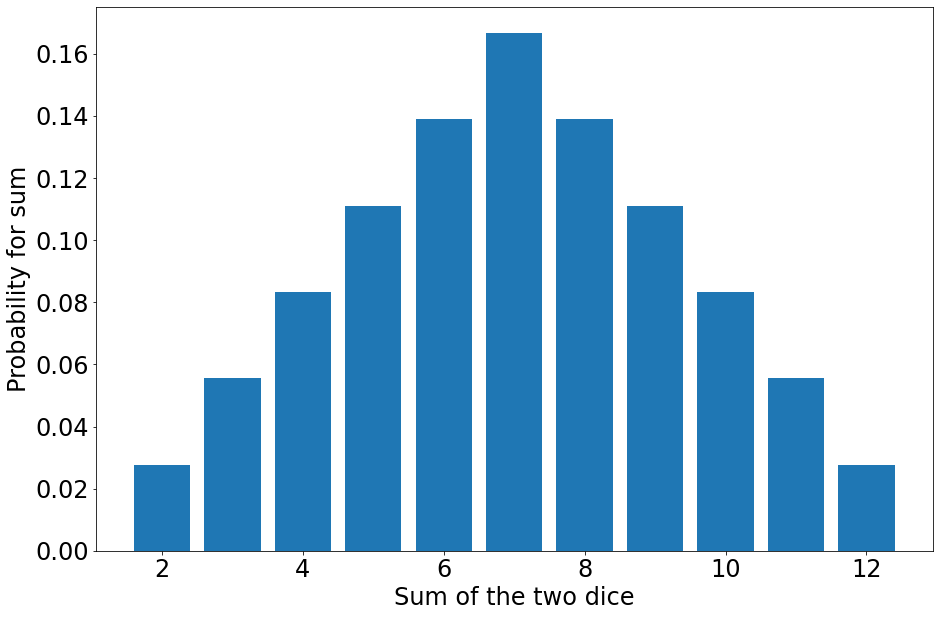

In [54]:
x = np.linspace(2, 12, 11)
dice_probabilities = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
y = np.convolve(dice_probabilities, dice_probabilities)
plt.bar(x, y)
plt.tick_params(labelsize=24)
plt.xlabel("Sum of the two dice", fontdict={'size':24})
plt.ylabel("Probability for sum", fontdict={'size':24})
plt.show()

### Question 3

Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

To calculate the variance and the mean of the distribution we will use python to evaluate the following equations:

$$\mu = E[X] = \sum_{k=2}^12 k * P(k)$$
$$\sigma^2 = E[X^2] - E[X]^2 = \sum_{k=2}^12 k^2 * P(k) - \mu^2$$

In [55]:
# lets calculate the mean of the distribution
expected_value = 0
for i in range(0, len(x)):
    expected_value += x[i] * y[i]
print(f'Mean when caluclated using a for loop: {expected_value}')

# lets calculate the variance
e_x_squared = 0
for i in range(0, len(x)):
    e_x_squared += (x[i]**2) * y[i]
variance = e_x_squared - (expected_value**2)
print(f'Variance of the distribution: {variance:.3f}')

Mean when caluclated using a for loop: 7.0
Variance of the distribution: 5.833


### Question 4

Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

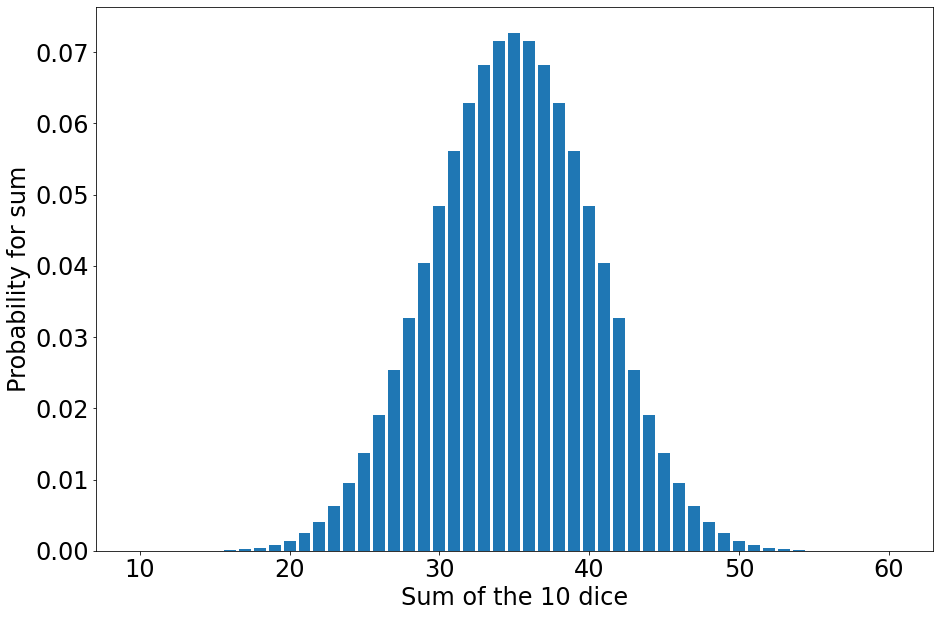

In [56]:
y10 = dice_probabilities
for i in range(0, 9):
    y10 = np.convolve(y10, dice_probabilities)
x10 = np.linspace(10, 60, len(y10))
plt.bar(x10, y10)
plt.tick_params(labelsize=24)
plt.xlabel("Sum of the 10 dice", fontdict={'size':24})
plt.ylabel("Probability for sum", fontdict={'size':24})
plt.show()

Now we can plot the average of the dice

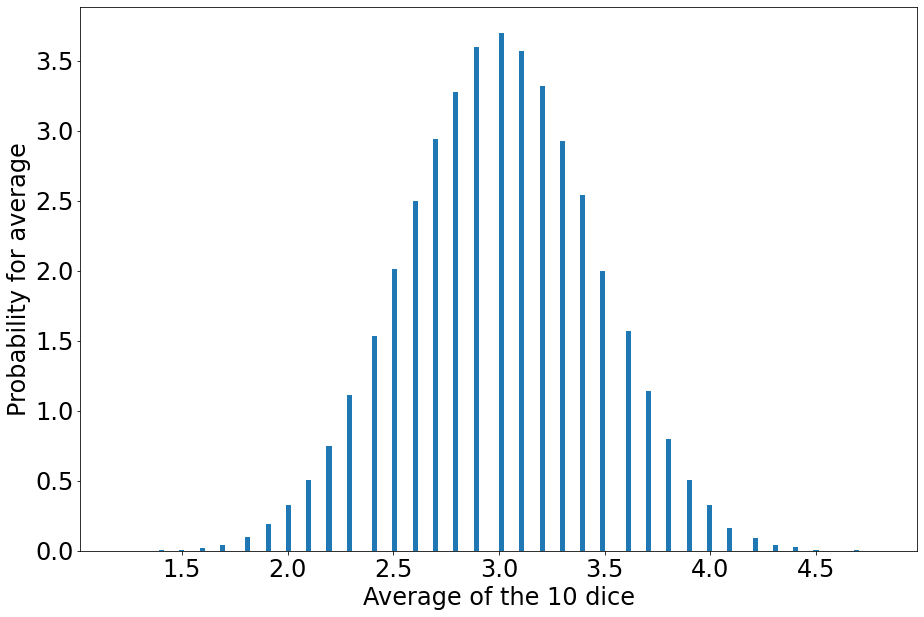

In [75]:
average_values = []
for i in range(0, 100000):
    average = 0
    for j in range(0, 10):
        average += np.random.randint(1, 6)
    average_values.append(average / 10)
    
plt.hist(average_values, bins=150, density=True)
plt.tick_params(labelsize=24)
plt.xlabel("Average of the 10 dice", fontdict={'size':24})
plt.ylabel("Probability for average", fontdict={'size':24})
plt.show()

To determine if this is a gaussian distribution we will plot on a semi-log scale plot and look for a parabola

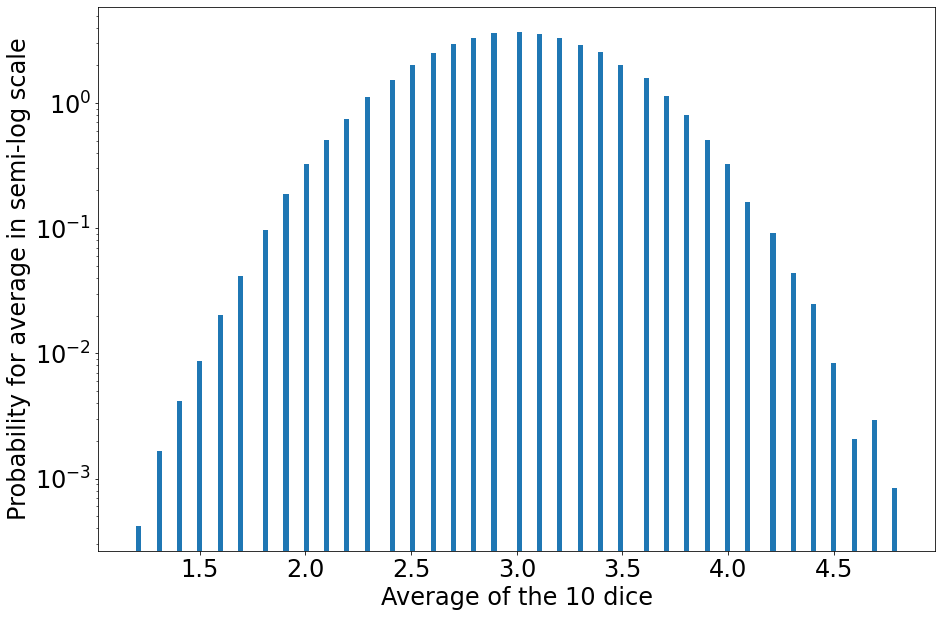

In [76]:
plt.hist(average_values, bins=150, density=True)
plt.yscale('log')
plt.tick_params(labelsize=24)
plt.xlabel("Average of the 10 dice", fontdict={'size':24})
plt.ylabel("Probability for average in semi-log scale", fontdict={'size':24})
plt.show()

From the above plot we can see that we do approximatly have a Gaussian curve but there are artifacts near the edges.  This result displays that while we have converged more closely to a Gaussian distribution, we still do not have exactly a Gaussian distribution.  If we were to average a few more dice together however we would converge closer, around 20 dice would be a great approximation for the Guassian.

### Question 5

Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

In [90]:
xgaus = []
ygaus = []
for i in np.linspace(-20, 20, 1000):
    xgaus.append(i)
    ygaus.append(stats.norm.pdf(i))

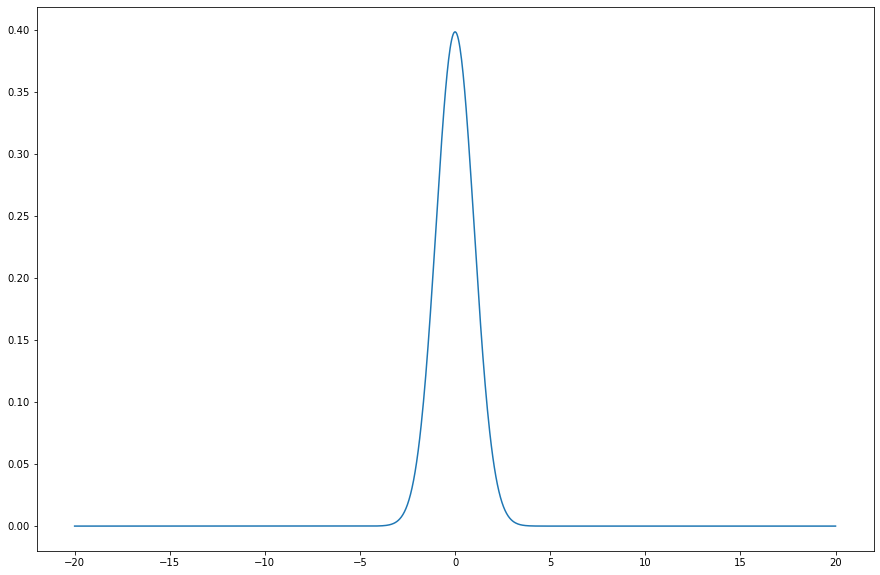

In [91]:
plt.plot(xgaus, ygaus)